<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week3/CNN_%26_MLP_TensorFlow_SVHN_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN & MLP menggunakan TensorFlow🍿**

CNN dirancang khusus untuk menangani data berbentuk grid, seperti gambar.MLP menggunakan fungsi aktivasi seperti ReLU atau sigmoid untuk menangani non-linearitas.Cocok untuk data terstruktur seperti tabel dalam tugas regresi dan klasifikasi.

MLP : Setiap neuron di satu lapisan terhubung penuh ke semua neuron di lapisan berikutnya (Fully Connected Layer).

CNN : Menggunakan lapisan konvolusi untuk mengekstrak fitur dari gambar dengan filter (kernel).Memiliki pooling layer (misalnya MaxPooling) untuk mengurangi dimensi fitur dan mengurangi overfitting.







## Persiapan dan Instalasi🥨

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


## Load Data📊

In [ ]:
# Load dataset SVHN
(ds_train, ds_test), ds_info = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True, with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.JCK5YG_3.1.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.JCK5YG_3.1.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.JCK5YG_3.1.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.1.0. Subsequent calls will reuse this data.


## PreProcessing 🔎

In [ ]:
# Normalisasi gambar
def normalize_img(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalisasi ke [0,1]
    return image, label

In [ ]:
# Preprocessing dataset
BATCH_SIZE = 128
ds_train = ds_train.map(normalize_img).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


## Definisi Model🔖

In [ ]:
# ================== CNN Model ==================
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile CNN Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train CNN Model
cnn_history = cnn_model.fit(ds_train, validation_data=ds_test, epochs=15)


Epoch 1/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.6699 - loss: 1.0803 - val_accuracy: 0.7889 - val_loss: 0.6888
Epoch 2/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8780 - loss: 0.4097 - val_accuracy: 0.8554 - val_loss: 0.5065
Epoch 3/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9065 - loss: 0.3143 - val_accuracy: 0.8541 - val_loss: 0.4922
Epoch 4/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9260 - loss: 0.2512 - val_accuracy: 0.8714 - val_loss: 0.4512
Epoch 5/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9381 - loss: 0.2041 - val_accuracy: 0.8688 - val_loss: 0.4764
Epoch 6/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9504 - loss: 0.1649 - val_accuracy: 0.8657 - val_loss: 0.5094
Epoch 7/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9596 - loss: 0.1314 - val_accuracy: 0.8806 - val_loss: 0.5190
Epoch 8/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9669 - loss: 0.1063 - 

In [ ]:
# ================== MLP Model ==================
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile MLP Model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Train & Evaluate Model 🐯

In [ ]:
# Train MLP Model
mlp_history = mlp_model.fit(ds_train, validation_data=ds_test, epochs=15)


Epoch 1/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.1705 - loss: 2.3682 - val_accuracy: 0.2071 - val_loss: 2.1776
Epoch 2/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.1898 - loss: 2.1846 - val_accuracy: 0.1959 - val_loss: 2.1755
Epoch 3/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1876 - loss: 2.1841 - val_accuracy: 0.1958 - val_loss: 2.1642
Epoch 4/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.1865 - loss: 2.1852 - val_accuracy: 0.1959 - val_loss: 2.1837
Epoch 5/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.1891 - loss: 2.1856 - val_accuracy: 0.1959 - val_loss: 2.1656
Epoch 6/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.1885 - loss: 2.1852 - val_accuracy: 0.1959 - val_loss: 2.1638
Epoch 7/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.1876 - loss: 2.1842 - val_accuracy: 0.1959 - val_loss: 2.1668
Epoch 8/15
573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.1861 - loss: 2.1822 - 

In [ ]:
# ================== Evaluasi Model ==================
def evaluate_model(model, dataset):
    y_true, y_pred = [], []

    for images, labels in dataset:
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)

        y_true.extend(labels.numpy())
        y_pred.extend(preds)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

    return acc, precision, recall, f1


In [ ]:
# Evaluasi CNN
cnn_acc, cnn_prec, cnn_rec, cnn_f1 = evaluate_model(cnn_model, ds_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

In [ ]:
# Evaluasi MLP
mlp_acc, mlp_prec, mlp_rec, mlp_f1 = evaluate_model(mlp_model, ds_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ================== Grafik Training (Loss & Akurasi) ==================
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


## Visualisasi Model 🍳

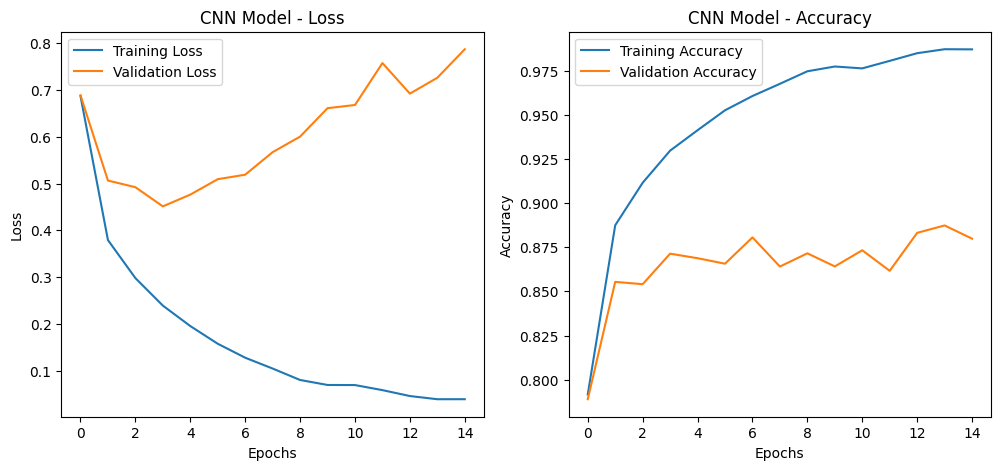

In [ ]:
# Plot training history CNN
plot_training_history(cnn_history, "CNN Model")


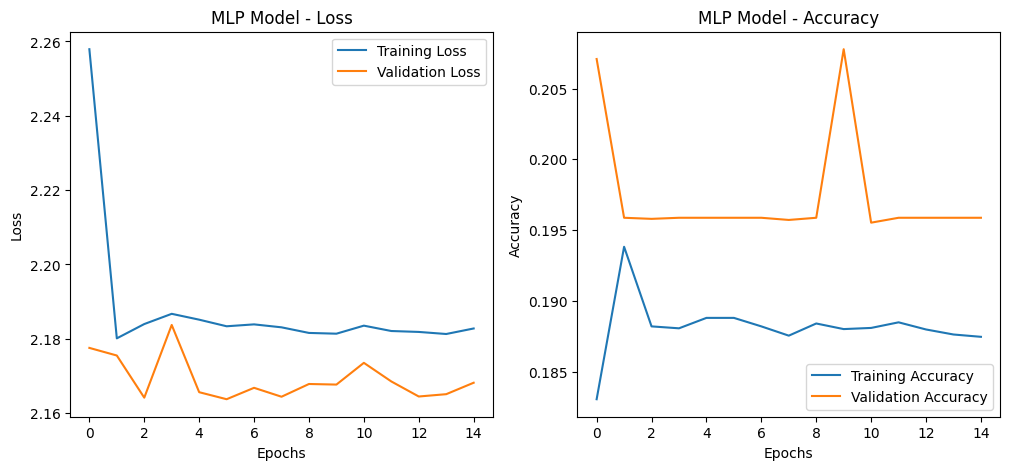

In [ ]:
# Plot training history MLP
plot_training_history(mlp_history, "MLP Model")


In [ ]:
# ================== Grafik Perbandingan CNN vs MLP ==================
models = ["CNN", "MLP"]
accuracies = [cnn_acc, mlp_acc]
precisions = [cnn_prec, mlp_prec]
recalls = [cnn_rec, mlp_rec]
f1_scores = [cnn_f1, mlp_f1]

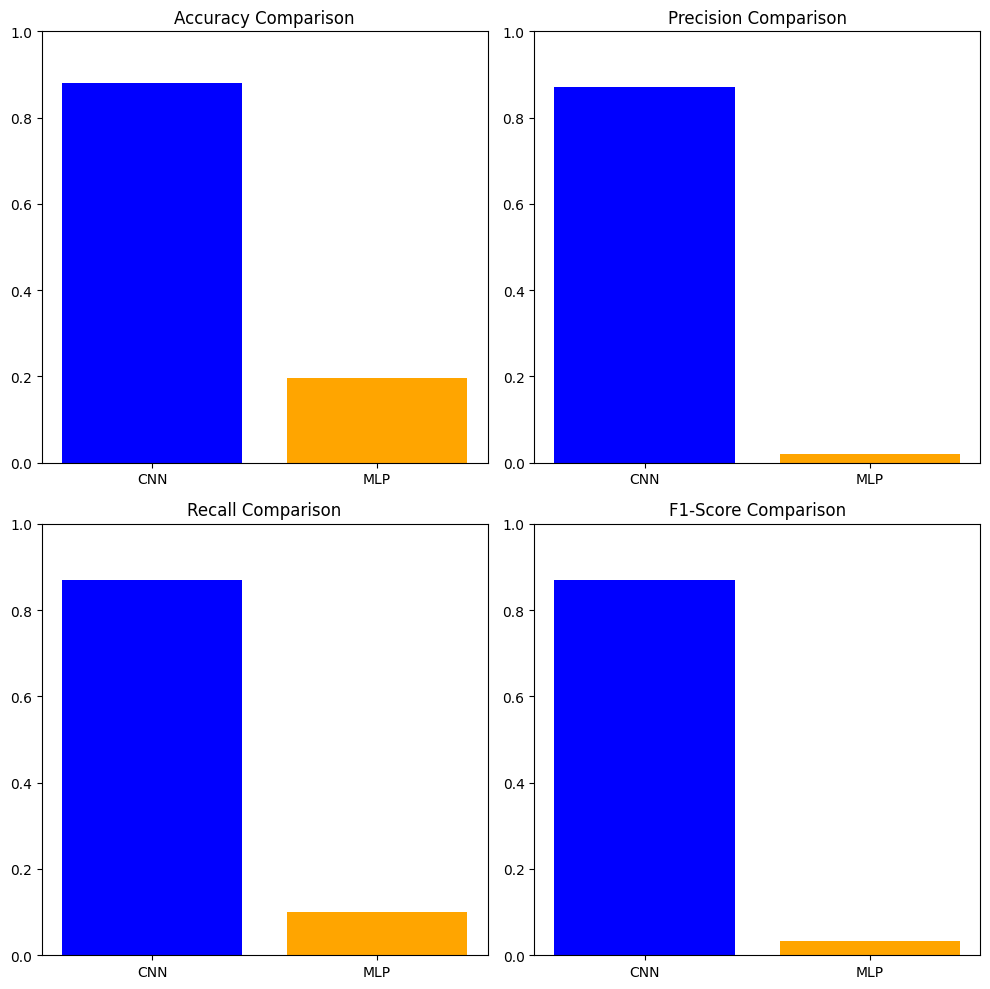

In [ ]:
# Membuat grafik perbandingan
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].bar(models, accuracies, color=['blue', 'orange'])
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(models, precisions, color=['blue', 'orange'])
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].bar(models, recalls, color=['blue', 'orange'])
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(models, f1_scores, color=['blue', 'orange'])
axs[1, 1].set_title('F1-Score Comparison')
axs[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

#**Penjelasan Singkat**

1️⃣ Akurasi (Accuracy)

Akurasi mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi.


Akurasi=

*TP+TN/
TP+TN+FP+FN*
​

📌 Keterangan:

TP (True Positive) → Prediksi benar sebagai positif.

TN (True Negative) → Prediksi benar sebagai negatif.

FP (False Positive) → Prediksi salah sebagai positif.

FN (False Negative) → Prediksi salah sebagai negatif.


2️⃣ Presisi (Precision)

Presisi mengukur seberapa akurat model dalam memprediksi kelas positif.

Presisi=
*TP/
TP+FP*



📌 Keterangan:

Jika model memiliki presisi tinggi, berarti model jarang salah dalam memprediksi kelas positif.

Jika presisi rendah, model sering salah memprediksi negatif sebagai positif (False Positive tinggi).

3️⃣ Recall (Sensitivitas)

Recall mengukur seberapa baik model dalam menangkap semua kasus positif.

Recall=
*TP/
TP+FN*


📌 Keterangan:

Jika recall tinggi, berarti model berhasil menangkap hampir semua data positif.
Jika recall rendah, model sering gagal mengenali positif sebagai negatif (False Negative tinggi).

4️⃣ F1-Score (Harmonic Mean)
F1-score menggabungkan presisi dan recall dalam satu metrik menggunakan rata-rata harmonik.

𝐹
1
=
2
×
Presisi
×
Recall/
Presisi
+
Recall

📌 Keterangan:

F1-score tinggi berarti model seimbang dalam presisi dan recall.

Bagus untuk dataset tidak seimbang, karena mempertimbangkan False Positive dan False Negative secara bersamaan.

5️⃣ Area Under Curve (AUC - ROC)
AUC (Area Under Curve) mengukur seberapa baik model membedakan antara kelas positif dan negatif.

AUC berasal dari ROC Curve, yang membandingkan True Positive Rate (TPR) vs False Positive Rate (FPR).

TPR
=
𝑇
𝑃/
𝑇
𝑃
+
𝐹
𝑁

(Sama dengan Recall)

*FPR=
FP/
FP+TN*

📌 Keterangan:

AUC = 1.0 → Model sempurna (memisahkan kelas dengan sempurna).
AUC = 0.5 → Model acak (tidak lebih baik dari tebak-tebakan).
AUC < 0.5 → Model lebih buruk dari acak (terbalik).

6️⃣ Receiver Operating Characteristic (ROC) Curve

ROC Curve adalah grafik yang membandingkan TPR vs FPR pada berbagai threshold.


Sumbu X → FPR (False Positive Rate)

Sumbu Y → TPR (True Positive Rate / Recall)

📌 Bagaimana membacanya?


Semakin tinggi kurva, semakin baik model.

ROC yang mendekati diagonal (AUC ≈ 0.5) berarti model tidak berguna.